# SHA571 - Understanding and Visualizing Data
## Course Project

## Goal:
This project guides you through the process of applying a data decision framework to an\
important decision-making situation in your organization or career.

## My Project:
I looked at many sources of Data Science related data, but could not find anything suitable for the given scenario. So as most suited to my current situation, as a student studying Data Science, I decided to go on a job portal, learn web scraping and make my own data set which I can derive my answers from. While looking at the metrics provided in the job listings the Experience, Salary and Skills seemed to be of major importance and key insight to what I had in mind.

- What are the industry requirements from a fresher?
- What key skills are trending in the Industry as of now?
- How does experience translate into pay grade?
- Different skills required in different data related fields?

Since I am atudent of Fine Arts my insight here is somewhat for curiosity needs, self evaluation of where data stands as a field in my country

### Prerequisites

In [175]:
#For Scraping the data off the internet
from IPython.display import clear_output
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
import numpy as np
import seaborn as sns

In [176]:
filename = str(input('Enter file name prefix:'))
directory = str(input('Save Directory:'))
job = str(input('Enter job role:'))

Enter file name prefix: datajobs
Save Directory: G:\My Drive\Desktop\PGP-Data Science\DataSets
Enter job role: data


### 1. Data Scraping

In [181]:
df = pd.DataFrame(columns=['Company', 'Role', 'Experience', 'Salary', 'Location', 'Skills']) #Dataframe

#### Scraper

In [182]:
option = webdriver.ChromeOptions()
option.add_argument('headless') #to run in the background to prevent accidental errors, already debugged :3
link = f'https://www.naukri.com/{job}-jobs'

def scrape():
    global job #link is updated globally to prevent repeats on recursion
    global df
    global link
    d = {}
    driver = webdriver.Chrome(r'G:\My Drive\Desktop\Tools\chromedriver89', options=option)
    driver.get(link); time.sleep(3) #Data being sourced from naukri.com
    #driver.find_element_by_css_selector('input#qsb-keyword-sugg').send_keys(job)  #Fills in job variable in search
    #driver.find_element_by_css_selector("form[name='quickSearchBarForm']  .btn").click(); time.sleep(3) #SearchButton click

    #Complete pagination collected to make code short and efficient
    #Scraping all listings from the website on the given keyword

    while True:
        try:
            clear_output()
            print(f'{len(df)} values at URL {driver.current_url}')
            company = [x.text for x in driver.find_elements_by_xpath("//div[@id='root']//div[@class='content']/section/div[@class='list']/article/div[@class='jobTupleHeader']/div[1]/div[1]/a[@title][1]")]
            role = [x.text for x in driver.find_elements_by_xpath("//div[@id='root']//div[@class='content']/section/div[@class='list']/article/div[@class='jobTupleHeader']/div[1]/a")]
            experience = [x.text for x in driver.find_elements_by_xpath("//div[@id='root']//div[@class='content']/section/div[@class='list']/article/div[@class='jobTupleHeader']/div/ul[@class='mt-7']//span")][0::3]
            salary = [x.text for x in driver.find_elements_by_xpath("//div[@id='root']//div[@class='content']/section/div[@class='list']/article/div[@class='jobTupleHeader']/div/ul[@class='mt-7']//span")][1::3]
            location = [x.text for x in driver.find_elements_by_xpath("//div[@id='root']//div[@class='content']/section/div[@class='list']/article/div[@class='jobTupleHeader']/div/ul[@class='mt-7']//span")][2::3]
            skills = [x.text.split('\n') for x in driver.find_elements_by_xpath("//div[@id='root']//div[@class='content']/section[2]/div[@class='list']/article/ul")]
           
            d.update({'Company': company, 'Role': role, 'Experience': experience, 'Salary': salary, 'Location': location, 'Skills': skills})
            df = df.append(pd.DataFrame(d))

            driver.find_element_by_css_selector('.br2.btn-secondary.fright.fs14').click(); time.sleep(2) #next page button
            link = str(driver.current_url) #updating the link so bot continues from where it left off
            print(f'New Link: {link}')
            
        
            #raw container text but faster
            #d +=[x.text for x in driver.find_elements_by_xpath("/html//div[@id='root']//div[@class='content']/section[2]/div[@class='list']/article")]
        except Exception as e:
            print(e)
            driver.find_element_by_css_selector('.br2.btn-secondary.fright.fs14').click(); time.sleep(2) #next page if current page has errors
            link = str(driver.current_url) #link update to prevent stuck loop
            driver.close()
            driver.quit()
            df.to_csv(f'{directory}\\{filename}_RAW.csv', index = False) #export csv on error
            scrape() #recursion          

RAW.csv is exported from above to your defined directory.\
Run the cell below and wait till it is finished or youre satisfied with the entry count.

In [ ]:
scrape() #Throws a giant error after scraping all possible elements, 638 pages in this case

### 2. Feature Implementation

In [184]:
data = pd.DataFrame()
df = pd.read_csv(f'{directory}\\{filename}_RAW.csv') #scraping in another doc and appending to this file

In [185]:
df.head(5)

,Company,Role,Experience,Salary,Location,Skills
0,Mac Tech Solutions,Required DATA Entry/Computer Operator PART-FUL...,0-5 Yrs,"3,00,000 - 7,00,000 PA.","Bangalore/Bengaluru, Delhi / NCR, Mumbai (All ...","['BPO', 'self employed', 'cce', 'computer oper..."
1,Computer Operator/data Entry/bpo,Computer Operator/Data Entry/Bpo,0-3 Yrs,"1,25,000 - 3,25,000 PA.",Pune,"['BPO', 'data entry', 'Customer Service', 'Wor..."
2,Mac Tech Solutions,DATA Entry/Computer Operator/WORK FROM Home/Fr...,0-5 Yrs,"2,75,000 - 7,00,000 PA.","Kolkata, Hyderabad/Secunderabad, Chennai","['BPO', 'CCE', 'Non Voice Process', 'Computer ..."
3,Inflexion Analytix Private Limited,Data Engineer/Data Analyst- Chennai,0-2 Yrs,"3,50,000 - 4,25,000 PA.","Hyderabad/Secunderabad, Pune, Chennai, Bangalo...","['IT Skills', 'Python', 'Machine Learning', 'A..."
4,"data entry, back office, calling, voice, non v...",Back Office Computer Operator,0-3 Yrs,"1,25,000 - 3,25,000 PA.",Pune,"['BPO', 'back office', 'Email Support', 'Custo..."


#### Observed feature implementations:
1. A major portion of the salary is not disclosed by the job poster but for the ones that do have salaries monetioned need to be split into min and max for each.
2. The experience requirements needs to split into min and max for each.
3. Roles need to be cleaned up in some way that makes sense.
5. City can be cleaned up or possibly split into seperate rows for each.
6. Skills need to be divided into columns of unique values for list in each row.
7. The misc column is a mix of job ListingType and ListingAge. Edit: Removed from scraping as 30days and above says 30+ Days :/

In [186]:
df.describe()

,Company,Role,Experience,Salary,Location,Skills
count,152412,152412,152412,152412,152412,152412
unique,13103,32006,243,556,3186,48190
top,Accenture Solutions Pvt Ltd,Data Scientist,5-10 Yrs,Not disclosed,Bangalore/Bengaluru,"['Help Desk', 'Customer Service', 'data analys..."
freq,8708,1541,10957,135317,42997,514


#### PreCleanup Notes:
1. The brand with most data science jobroles open is Accenture which is involved in consultancy services.
2. Most seeked out role is of an Analyst
3. Best city to be in for Data Science is Bangalore, which was predictable being the technological hub.
4. Skills are in lists so frequency doesn't make any differnce

In [187]:
data['Company'] = df['Company']

In [188]:
df['Experience'].unique() #two stray elements...

array(['0-5 Yrs', '0-3 Yrs', '0-2 Yrs', '0-4 Yrs', '0-1 Yrs', '4-9 Yrs',
       '4-7 Yrs', '5-10 Yrs', '10-20 Yrs', '12 April - 21 April',
       '3-6 Yrs', '0-10 Yrs', '16 April - 25 April', '2-5 Yrs', '4-8 Yrs',
       '2-6 Yrs', '2-7 Yrs', '20 April - 22 April', '1-5 Yrs', '7-12 Yrs',
       '4-6 Yrs', '3-5 Yrs', '6-9 Yrs', '3-4 Yrs', '10-15 Yrs', '3-8 Yrs',
       '5-8 Yrs', '3-7 Yrs', '6-8 Yrs', '5-7 Yrs', '1-6 Yrs', '1-4 Yrs',
       '12-14 Yrs', '10-12 Yrs', '10-13 Yrs', '8-13 Yrs', '8-10 Yrs',
       '3-10 Yrs', '2-10 Yrs', '0-6 Yrs', '2-4 Yrs', '1-3 Yrs',
       '6-10 Yrs', '12-22 Yrs', '20 April - 24 April', '8-12 Yrs',
       '12-15 Yrs', '7-9 Yrs', '7-10 Yrs', '9-12 Yrs', '10-14 Yrs',
       '5-9 Yrs', '7-11 Yrs', '5-6 Yrs', '4-5 Yrs', '0-0 Yrs', '9-14 Yrs',
       'PG Diploma, M.Tech, Diploma, B.Tech/B.E.', '6-11 Yrs', '2-3 Yrs',
       '15-18 Yrs', '15-17 Yrs', '5-12 Yrs', '12-18 Yrs', '3-13 Yrs',
       '10-16 Yrs', '1-2 Yrs', '6-12 Yrs', '19 April - 23 April',
       '1

In [152]:
#print(df[df['Experience'] == 'M.Pharma, B.Pharma, Diploma'].index)
#print(df[df['Experience'] == 'Any Graduate'].index)
#print(df[df['Experience'].str.contains('April')].index)
#df = df.drop(index=[1400, 1401, 1607, 5712, 5719, 5721, 5724, 5725, 6379, 6389]) #cleaning up
#df['Experience'].unique()

In [189]:
df['Experience'][14].split('-')[0]

'0'

In [190]:
data['MinExp'] = df['Experience'].apply(lambda x: int(x.split('-')[0]) if x.split('-')[0].isnumeric() else 0)

In [191]:
data['MinExp'].unique()

array([ 0,  4,  5, 10,  3,  2,  1,  7,  6, 12,  8,  9, 15, 11, 14, 13, 18,
       16, 20, 17, 19, 21], dtype=int64)

In [192]:
df['Location'].unique()[0:20]

array(['Bangalore/Bengaluru, Delhi / NCR, Mumbai (All Areas)', 'Pune',
       'Kolkata, Hyderabad/Secunderabad, Chennai',
       'Hyderabad/Secunderabad, Pune, Chennai, Bangalore/Bengaluru',
       'Faridabad', 'Pune, Ahmedabad, Gurgaon/Gurugram',
       'Ahmedabad(Ghatlodia)', 'Chennai', 'Surat', 'Bangalore/Bengaluru',
       'Kolkata, Ahmedabad, Chennai, Bangalore/Bengaluru, Mumbai (All Areas)',
       'Noida, Delhi / NCR', 'Hyderabad/Secunderabad',
       'New Delhi(Jhilmil Industrial Area)',
       'Kodangal, Patancheru, Hyderabad/Secunderabad, Medchal, Sadasivpet',
       'Gurgaon/Gurugram', 'Bengaluru', 'Mumbai (All Areas)',
       'Hyderabad/Secunderabad, Bangalore/Bengaluru', 'Salem'],
      dtype=object)

In [193]:
data['Loc'] = df['Location'].apply(lambda x: x.split(',')[0]) #City of company
#data['Loc2'] = df['Location'].apply(lambda x: x.split(',')[1] if len(x.split(','))>1 else None) #Second mentioned city
data['Loc'] = data['Loc'].apply(lambda x: x.split(' ')[0])
data['Loc'] = data['Loc'].apply(lambda x: x.split('/')[0])
data['Loc'] = data['Loc'].apply(lambda x: x.split('(')[0])
data['Loc'].unique()[0:20]

array(['Bangalore', 'Pune', 'Kolkata', 'Hyderabad', 'Faridabad',
       'Ahmedabad', 'Chennai', 'Surat', 'Noida', 'New', 'Kodangal',
       'Gurgaon', 'Bengaluru', 'Mumbai', 'Salem', 'Visakhapatnam',
       'Pimpri-Chinchwad', 'Kalyan', 'Bellary', 'Jalandhar'], dtype=object)

Second cities are siginificanly lower so no point in keeping it as a factor

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152412 entries, 0 to 152411
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Company  152412 non-null  object
 1   MinExp   152412 non-null  int64 
 2   Loc      152412 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.5+ MB


In [195]:
#data = data.drop('Loc2', axis=1)
#data['Loc'].unique()[0:20]

In [196]:
df['Skills'][1] #skill splitting was not working

"['BPO', 'data entry', 'Customer Service', 'Word', 'MNC', 'Computer Operating', 'Data Maintenance', 'Voice Process']"

I have no clue why this was scraped and appended as a string...

In [197]:
df['Skills'][1].strip('][').replace("'", "").split(', ') #Why was is this a string...?

['BPO',
 'data entry',
 'Customer Service',
 'Word',
 'MNC',
 'Computer Operating',
 'Data Maintenance',
 'Voice Process']

In [198]:
for y in range(1, 9): #iterating the column names, converting the string to a formatted list, appending based on position in list.
    data[f'Skill{y}'] = df['Skills'].apply(lambda x: x.strip("][").replace("'", "").split(',')[y].lower()\
                                           if len(x.strip('][').split(', '))>y else None) #added lowercaseonly and got siginificant changes in 

Note: Added lower case only and got siginificant changes in Visualization output on Tableau. Intersting fact.

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152412 entries, 0 to 152411
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Company  152412 non-null  object
 1   MinExp   152412 non-null  int64 
 2   Loc      152412 non-null  object
 3   Skill1   150994 non-null  object
 4   Skill2   149679 non-null  object
 5   Skill3   146975 non-null  object
 6   Skill4   143542 non-null  object
 7   Skill5   139412 non-null  object
 8   Skill6   134162 non-null  object
 9   Skill7   127982 non-null  object
 10  Skill8   4 non-null       object
dtypes: int64(1), object(10)
memory usage: 12.8+ MB


Number of skills have already been taken care off by skipping posts with too many requirements, there is just one post with a special skill....

In [200]:
data[data['Skill8'].notnull()]

,Company,MinExp,Loc,Skill1,Skill2,Skill3,Skill4,Skill5,Skill6,Skill7,Skill8
23398,Ekennis Software Services Pvt Ltd,4,Jaipur,bct configuration,teamcenter 11 x,fms configuration,itk customization,teamcenter architecture ( 2t,4t ),jsp,acl
23442,Ekennis Software Services Pvt Ltd,4,Jaipur,bct configuration,teamcenter 11 x,fms configuration,itk customization,teamcenter architecture ( 2t,4t ),jsp,acl
48895,Ekennis Software Services Pvt Ltd,4,Jaipur,bct configuration,teamcenter 11 x,fms configuration,itk customization,teamcenter architecture ( 2t,4t ),jsp,acl
92985,Ekennis Software Services Pvt Ltd,4,Jaipur,bct configuration,teamcenter 11 x,fms configuration,itk customization,teamcenter architecture ( 2t,4t ),jsp,acl


The magical skill is OLAP, need to google what that is. xD

In [201]:
data = data.drop('Skill8', axis=1)

Now need to extract the salary but it is mostly filled with 'NotDisclosed' values and is it possible to extract the same using the skills by correlating it?....

In [202]:
data = data.fillna('None') #all categorical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152412 entries, 0 to 152411
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Company  152412 non-null  object
 1   MinExp   152412 non-null  int64 
 2   Loc      152412 non-null  object
 3   Skill1   152412 non-null  object
 4   Skill2   152412 non-null  object
 5   Skill3   152412 non-null  object
 6   Skill4   152412 non-null  object
 7   Skill5   152412 non-null  object
 8   Skill6   152412 non-null  object
 9   Skill7   152412 non-null  object
dtypes: int64(1), object(9)
memory usage: 11.6+ MB


In [203]:
df.head(3)

,Company,Role,Experience,Salary,Location,Skills
0,Mac Tech Solutions,Required DATA Entry/Computer Operator PART-FUL...,0-5 Yrs,"3,00,000 - 7,00,000 PA.","Bangalore/Bengaluru, Delhi / NCR, Mumbai (All ...","['BPO', 'self employed', 'cce', 'computer oper..."
1,Computer Operator/data Entry/bpo,Computer Operator/Data Entry/Bpo,0-3 Yrs,"1,25,000 - 3,25,000 PA.",Pune,"['BPO', 'data entry', 'Customer Service', 'Wor..."
2,Mac Tech Solutions,DATA Entry/Computer Operator/WORK FROM Home/Fr...,0-5 Yrs,"2,75,000 - 7,00,000 PA.","Kolkata, Hyderabad/Secunderabad, Chennai","['BPO', 'CCE', 'Non Voice Process', 'Computer ..."


In [204]:
data['Pay'] = df['Salary'].apply(lambda x: int(x.split(' ')[0].replace(',', '')) if len(x.split(' '))>2 else 'None')
data['MaxPay'] = df['Salary'].apply(lambda x: int(x.split(' ')[2].replace(',', '')) if len(x.split(' '))>2 and  x.split(' ')[2].replace(',', '').isnumeric() else 'None')

In [205]:
data.head(3)

,Company,MinExp,Loc,Skill1,Skill2,Skill3,Skill4,Skill5,Skill6,Skill7,Pay,MaxPay
0,Mac Tech Solutions,0,Bangalore,self employed,cce,computer operator,non voice process,customer care,computer operating,non voice,300000,700000
1,Computer Operator/data Entry/bpo,0,Pune,data entry,customer service,word,mnc,computer operating,data maintenance,voice process,125000,325000
2,Mac Tech Solutions,0,Kolkata,cce,non voice process,computer operating,customer care,non voice,self employed,ms office,275000,700000


In [206]:
data.columns

Index(['Company', 'MinExp', 'Loc', 'Skill1', 'Skill2', 'Skill3', 'Skill4',
       'Skill5', 'Skill6', 'Skill7', 'Pay', 'MaxPay'],
      dtype='object')

<AxesSubplot:>

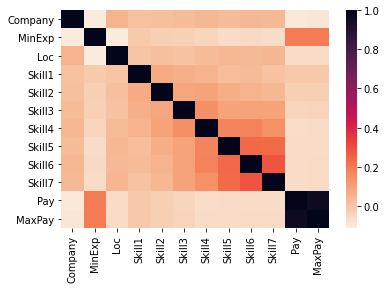

In [207]:
cmat = pd.DataFrame()
for x in data.columns:
    cmat[x] = data[x].astype('category').cat.codes
    
sns.heatmap(cmat.corr(), cmap=sns.cm.rocket_r)

Not sure if I did it the right way but I suppose experience is the only affecting factor here with skills making minor differences.\
The correlation of skills is interesting though they don't have any commonalities as the list has been scraped and split at random.\
Will further visualize and note findings on Tableau. Thank you.

In [208]:
for x in data.columns:
    print(f'{x}\n{data[x].unique()[0:30]}\n\n')

Company
['Mac Tech Solutions' 'Computer Operator/data Entry/bpo'
 'Inflexion Analytix Private Limited'
 'data entry, back office, calling, voice, non voice, backend, computer Opearator'
 'Data Solutions India' 'HealthTech India'
 'ABOTTS Consulting India Pvt Ltd' 'Super India Tech Mark' 'COLLABERA'
 'HRXL 360 Private Limited'
 'NTT DATA GLOBAL DELIVERY SERVICES PRIVATE LIMITED'
 'IBM India Pvt. Limited' 'Shell India Markets Private Limited' 'Uber'
 'Sutherland Global Services Inc'
 'Accuprobe Healthcare and Diagnostics Pvt. Ltd.'
 'ChaitanyaHR consultancy' 'Decision Point' 'Luxoft'
 'CMS IT Services Private Limited' 'Recruitment Company' 'Siemens Limited'
 'Micron Semiconductor Asia Pte Ltd' 'Cameo Corporate Services Limited'
 'AVOCATION EDUCATIONAL SERVICES PRIVATE LIMITED'
 'SBL KNOWLEDGE SERVICES LIMITED' 'Essel Synerg Tech Pvt Ltd'
 'ThinkBumblebee Analytics Pvt. Ltd.'
 'ETON SOLUTIONS AND TECHNOLOGIES INDIA LLP'
 'Tekion India Private Limited']


MinExp
[ 0  4  5 10  3  2  1  7  6

In [209]:
data.to_csv(f'{directory}\\{filename}_Clean.csv', index = False)

DS_Clean is exported from here

### 2.1 Feature adjustments for tableau

In [65]:
data = pd.DataFrame()
data = pd.read_csv(f'{directory}\\{filename}_Clean.csv')

In [66]:
data.head(2)

,MinExp,Loc,Skill1,Skill2,Skill3,Skill4,Skill5,Skill6,Skill7,Pay,MinPay,MaxPay
0,0,Bangalore,hospital,covid duties,None,None,None,None,None,None,None,None
1,0,Bangalore,hospital,covid duties,None,None,None,None,None,None,None,None


In [67]:
skills = []

In [68]:
for x in range(1,8):
    for y in data[f'Skill{x}']:
        skills.append(y)

In [69]:
len(skills)

215166

In [47]:
skills[999]

' medical'

In [48]:
skills = pd.DataFrame(skills, columns=['AllSkills'])

In [49]:
skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10780 entries, 0 to 10779
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   AllSkills  10780 non-null  object
dtypes: object(1)
memory usage: 84.3+ KB


In [50]:
skills.to_csv(r'G:\My Drive\Desktop\PGP-Data Science\eCornell\SHA571\DS_Skills.csv', index = False)